# Gradient Descent for Multilinear regression from scratch...
### Step by step process.....

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [83]:
data = pd.read_csv('GDP_Country.csv')
data.head()

,Country,Region,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [84]:
missing_data = data.isnull()
missing_counts = missing_data.sum()
data_filled = data.fillna(data.mean())
data= data.dropna()
data_ = data.drop(['Country','Region'], axis=1)
data_.head()

/var/folders/fj/q3pfzwv92w94qlx_fjpmnf_00000gn/T/ipykernel_5972/1312669024.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_filled = data.fillna(data.mean())


,Population,Area_sqm,Pop_Density_per sqm,Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
6,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
7,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743


In [85]:
gdp_stats = data['GDP ($ per capita)'].describe()

# Print the descriptive statistics
print(gdp_stats)

count      179.000000
mean      9125.698324
std       9644.123141
min        500.000000
25%       1800.000000
50%       5100.000000
75%      12950.000000
max      37800.000000
Name: GDP ($ per capita), dtype: float64


In [86]:
train_data = data.values
Y = train_data[:, 8].reshape(train_data.shape[0], 1)
X = train_data[:, [2, 3, 4, 5, 6, 7, 9, 10]]

print("Shape of X_train :", X.shape)
print("Shape of Y_train :", Y.shape)

Shape of X_train : (179, 8)
Shape of Y_train : (179, 1)


In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

# print data shapes...
print('x_train shape : ', x_train.shape)
print('x_test shape : ', x_test.shape)
print('y_train shape : ', y_train.shape)
print('y_test shape : ', y_test.shape)

x_train shape :  (125, 8)
x_test shape :  (54, 8)
y_train shape :  (125, 1)
y_test shape :  (54, 1)


## Step 1 : Normalize the data 

In [89]:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_transform=sc.fit_transform(x_train)
X_transform_test=sc.fit_transform(x_test)

## Step 2 : Initialize the parameters:

In [90]:

weight_vector=np.random.randn(x_train.shape[1])
intercept=0
learning_rate = 0.001


## Step 3 : Find derivatives of loss w.r.t weight and bias.



In [91]:

# Define the LOSS function ....

def loss(y,y_predicted):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s


In [92]:
# code for "wx+b"
def predicted_y(weight,x,intercept):
    y_lst=[]
    for i in range(len(x)):
        y_lst.append(weight@x[i]+intercept) #dot product btween weight and input
    return np.array(y_lst)

In [93]:
#derivative of loss w.r.t weight 
def dldw(x,y,y_predicted):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_predicted[i])
    return (2/n)*s

In [94]:
# derivative of loss w.r.t bias
def dldb(y,y_predicted):
    n=len(y)
    s=0
    for i in range(len(y)):
        s+=-(y[i]-y_predicted[i])
    return (2/n) * s

# Step 4: Update the weight and bias till we get the global minima.
        

In [95]:
# gradient function
def gradient_descent(x,y):
    
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 2000
    
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001

    for i in range(epoch):
        
        
        y_predicted = predicted_y(weight_vector,x,intercept)
        
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        
        
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(1,epoch),linear_loss[1:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    
    return weight_vector,intercept

weight: [-675.9846959747233 525.340668183765 478.3527898867331 97.30293276672023
 2200.57199714333 -1791.520296511955 246.6683763998169 6085.608231803621]
bias: [8952.058269839765]


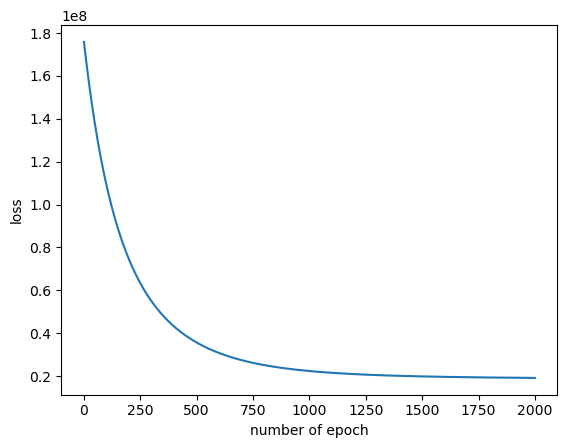

In [96]:
w,b=gradient_descent(X_transform,y_train)

print("weight:",w)
print("bias:",b)

# Prediction

In [97]:
def predict(inp):
    y_lst=[]
    for i in range(len(inp)):
        y_lst.append(w@inp[i]+b)
    return np.array(y_lst)

In [98]:
y_pred=predict(X_transform_test)
y_pred

array([[19479.221700912334],
       [5215.371841159567],
       [-1970.7808200093132],
       [1470.4122517215965],
       [488.4408336589331],
       [999.4435670448247],
       [15948.781005839692],
       [31181.38795428787],
       [12176.757980214155],
       [7540.004375780844],
       [12014.696273951762],
       [2841.823190422172],
       [15869.76102087064],
       [9669.100516349217],
       [16405.3248258015],
       [12467.195196086346],
       [18373.603741379127],
       [3719.154051985319],
       [895.8577011680609],
       [980.1656592409408],
       [18359.724546917132],
       [14696.836774604819],
       [5167.893327789795],
       [16270.283191482304],
       [1188.3777778033318],
       [98.3287450822827],
       [5300.539357716065],
       [1859.9103878152473],
       [6638.040932060538],
       [1511.3949825851396],
       [18735.421507591105],
       [12706.944229404915],
       [-1502.7544348162137],
       [4426.129751853521],
       [12428.968483301916],
  

In [100]:
from sklearn import metrics
import numpy as np

print('Mean Absulute Error (MAE) :',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error (MSE) :',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error (RMSE) :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absulute Error (MAE) : 2502.4963027218714
Mean Squared Error (MSE) : 12559405.821598498
Root Mean Squared Error (RMSE) : 3543.9251997747497


In [101]:
# Calculate R-squared (R2) and Adjusted R-squared
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

print("R-squared (R2):", r2)
print("Adjusted R-squared:", adjusted_r2)

R-squared (R2): 0.8601463622421534
Adjusted R-squared: 0.8352834933074251
